In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as LA

In [2]:
X = np.loadtxt('Viscosity.txt')
n = X.shape[0]
d = X.shape[1]
d -= 1
print(n,d)

499 190


In [11]:
n_train = int(n*0.8)
n_test  = n - n_train
X = np.random.permutation(X)

X_train = np.zeros((n_train,d))
X_test  = np.zeros((n_test,d))
Y_train = np.zeros((n_train,1))
Y_test = np.zeros((n_test,1))

X_train[:] = X[:n_train,:-1]
Y_train[:] = X[:n_train,-1].reshape((n_train,1))

X_test[:] = X[n_train:,:-1]
Y_test[:] = X[n_train:,-1].reshape((n_test,1))

print(X_train.shape)
print(X_test.shape)

(399, 190)
(100, 190)


In [12]:
""" jvking normalization """
X_train = X_train - np.mean(X_train, axis = 0)
X_test = X_test - np.mean(X_test, axis = 0)
for _ in range(d):
    if np.var(X_train[:]) != 0:
        X_train[:] = X_train[:] / np.std(X_train[:])
    if np.var(X_test[:]) != 0:
        X_test[:] = X_test[:] / np.std(X_test[:])

In [21]:
#initializing weight for first layer(w1) and second
#Parameters
hdnode = 10
w1 = np.random.normal(0,0.001,d*hdnode).reshape((d,hdnode))
d1 = np.zeros((d,hdnode))
w2 = np.random.normal(0,0.001,hdnode).reshape((hdnode,1))
d2 = np.zeros(hdnode)
h  = np.zeros(hdnode)
              
mb = 10 #minibatch size
m = int(n_train/mb)
batch = np.arange(m)
lr = 0.01 # 0.00000005
EP = 3000
samp = 10000
y = np.zeros((mb,1))
yh = np.zeros((n_train,1))
yh2 = np.zeros((n_test,1))

L_train= np.zeros(EP+1)
L_test = np.zeros(EP+1)

L01_train = np.zeros((EP+1))
L01_test = np.zeros((EP+1))


In [22]:

#Training the neural network
def g(A):
    return (np.tanh(A))

def gd(A):
    return (1-np.square(np.tanh(A)))

for ep in range(EP):
    #print(ep)

    yh = g(X_train.dot(w1)).dot(w2)
    yh2 = g(X_test.dot(w1)).dot(w2)
        
    L_train[ep] = LA.norm(yh-Y_train)/n_train
    L_test[ep]  = LA.norm(yh2-Y_test)/n_test
    
    print(ep,L_train[ep],L_test[ep])
        
    np.random.shuffle(batch)
    for i in range(m):
        st = batch[i]*mb
        ed = (batch[i]+1)*mb
        
        h  = g(X_train[st:ed].dot(w1))
        y = h.dot(w2)

        d2 = h.T.dot(Y_train[st:ed]-y)
        d1 = X_train[st:ed].T.dot(np.multiply((Y_train[st:ed]-y).dot(w2.T),gd(X_train[st:ed].dot(w1))))
        
        """ jvking gradient check """
        # for ii in range(w1.shape[0]):
        #     for jj in range(w1.shape[1]):
        #         w1[ii, jj] += 1e-7
        #         hh = g(X_train[st:ed].dot(w1))
        #         yyhh = h.dot(w2)

        w2 += lr*d2
        w1 += lr*d1


0 0.00785504630333 0.0124898545702
1 0.00785384877118 0.0124843306587
2 0.00785136171338 0.0124725242648
3 0.00784424078346 0.0124358974879
4 0.00783338084539 0.0123713642147
5 0.00782459095535 0.0123159394104
6 0.00781749574799 0.0122288832537
7 0.00781506175513 0.0122391489323
8 0.00781551476817 0.0121656136106
9 0.00781239337616 0.0122074361112
10 0.00781234495362 0.0121669944213
11 0.00781045726011 0.0121600422357
12 0.00781034667808 0.0121983106475
13 0.00781108839804 0.0121977237527
14 0.00781117358547 0.0122158766145
15 0.00781247314868 0.0122370623565
16 0.00781236296444 0.0122346978417
17 0.00781157067069 0.0122199870109
18 0.00781033457766 0.0121980097877
19 0.00781356460574 0.0122462669816
20 0.00781089028207 0.0121578502175
21 0.00780941199911 0.012157348171
22 0.00780875298999 0.012179144681
23 0.0078099967784 0.0121693969071
24 0.00780948200239 0.0121871289076
25 0.0078096234868 0.0121838249548
26 0.0078134332189 0.0121215224232
27 0.0078096596224 0.0122026307551
28 0.007

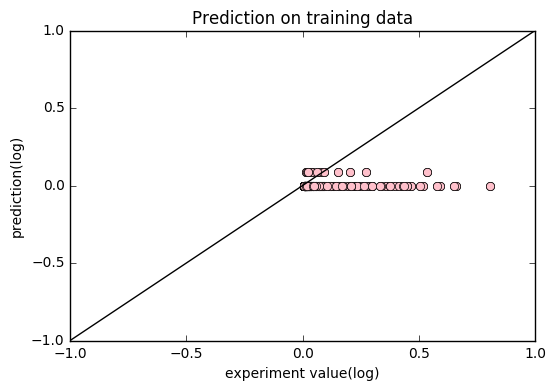

In [18]:
yh = g(X_train.dot(w1)).dot(w2)
plt.plot(Y_train,yh,"o",color ='pink')
plt.plot(np.arange(-1,1,0.0001),np.arange(-1,1,0.0001),color = 'black')
plt.axis([-1,1,-1,1])
plt.xlabel('experiment value(log)')
plt.ylabel('prediction(log)')
plt.title('Prediction on training data')
plt.show()

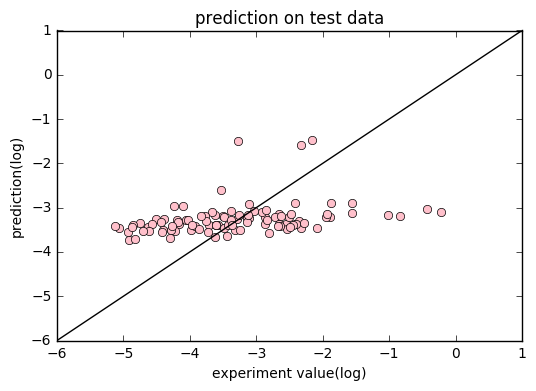

In [8]:
yh = g(X_test.dot(w1)).dot(w2)
plt.plot(Y_test,yh,"o",color ='pink')
plt.plot(np.arange(-6,1,0.0001),np.arange(-6,1,0.0001),color = 'black')
plt.axis([-6,1,-6,1])
plt.xlabel('experiment value(log)')
plt.ylabel('prediction(log)')
plt.title('prediction on test data')
plt.show()